# U.S. Medical Insurance Costs

In [57]:
import pandas as pd
import numpy as np
from scipy.stats import iqr
from matplotlib import pyplot as plt
import seaborn as sns

df = pd.read_csv("insurance.csv")


average and std of ages of people in this survey:  39.20702541106129 14.044709038954522 

95% of people in this survey are between 11.117607333152243 and 67.29644348897034 years old:  

The youngest person is 18 years old
The oldest person is 64 years old


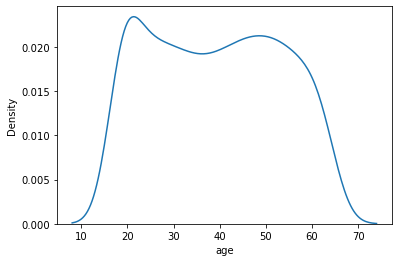

In [58]:
age_average = np.mean(df.age)
age_std = np.std(df.age)
print("average and std of ages of people in this survey: " , age_average , age_std, "\n")
print("95% of people in this survey are between {0} and {1} years old: "\
      .format( age_average - 2*age_std , age_average + 2*age_std) , "\n")

print("The youngest person is {0} years old".format(np.min(df.age)) )
print("The oldest person is {0} years old".format(np.max(df.age)) )
sns.kdeplot(df.age)
plt.show()



1338 people participated in this survey, which 662 number of them are female(49.48 percentage) and 676 of them are male (50.52 percentage ) 

sex
female    39.503021
male      38.917160
Name: age, dtype: float64 



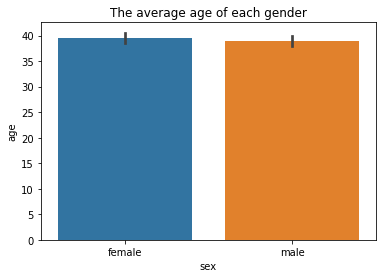

In [59]:

print("{0} people participated in this survey, which {1} number of them are female\
({2:.2f} percentage) and {3} of them are male ({4:.2f} percentage )\
".format(len(df), len(df[df.sex == "female"]), 100 * len(df[df.sex == "female"])/len(df),\
         len(df[df.sex == "male"]), 100 * len(df[df.sex == "male"])/len(df) ), "\n")


print(df.groupby("sex").age.mean(), "\n")
plt.title("The average age of each gender")
sns.barplot(data = df, x = "sex", y = "age" )
plt.show()


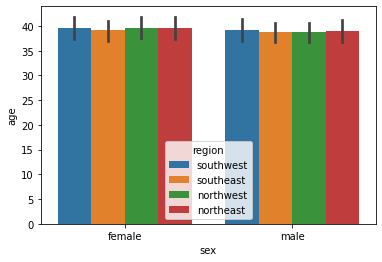

In [60]:
sns.barplot(data = df, x = "sex", y = "age", hue = "region")
plt.show()

The number of smoker in each gender:
sex
female    115
male      159
Name: smoker, dtype: int64 



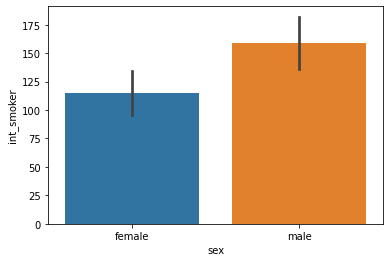

In [61]:
print("The number of smoker in each gender:")
print(df.groupby("sex").smoker.apply(lambda x : sum(x == "yes")), "\n")

df['int_smoker'] = df.smoker.apply(lambda x:1 if x=="yes" else 0)

sns.barplot(data = df, x = "sex", y = "int_smoker", estimator = np.sum )
plt.show()

The average cost of each gender: 
sex
female    12569.578844
male      13956.751178
Name: charges, dtype: float64


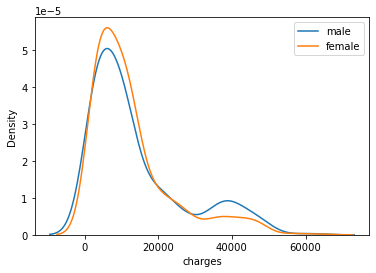

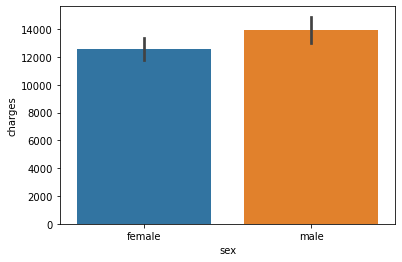

In [76]:
print("The average cost of each gender: ")
print(df.groupby("sex").charges.mean())
male_charges = df[df.sex == "male"].charges
female_charges = df[df.sex == "female"].charges
sns.kdeplot(male_charges)
sns.kdeplot(female_charges)
plt.legend(["male", "female"])
plt.show()

sns.barplot(data= df, x = "sex" , y = "charges")
plt.show()

The average cost in each region: 
region
northeast    13406.384516
northwest    12417.575374
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64


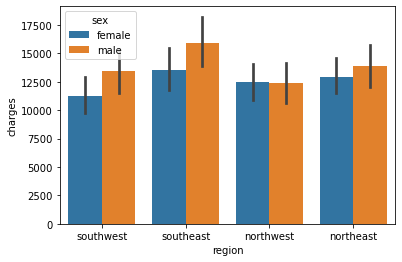

In [79]:
print("The average cost in each region: ")
print(df.groupby("region").charges.mean())
sns.barplot(data = df, x = "region", y = "charges", hue = "sex")
plt.show()

smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64


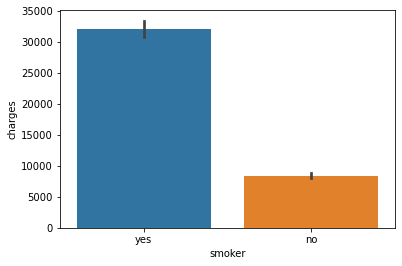

In [82]:
print(df.groupby("smoker").charges.mean())
sns.barplot(data = df, x = "smoker", y = "charges")
plt.show()

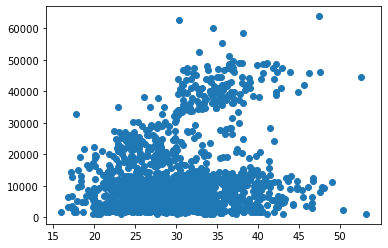

In [83]:
plt.scatter(df.bmi, df.charges)
plt.show()

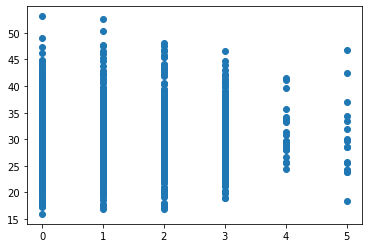

In [84]:
plt.scatter(df.children, df.bmi)
plt.show()

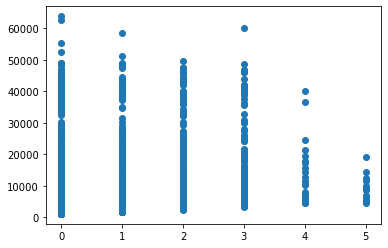

In [85]:
plt.scatter(df.children, df.charges)
plt.show()

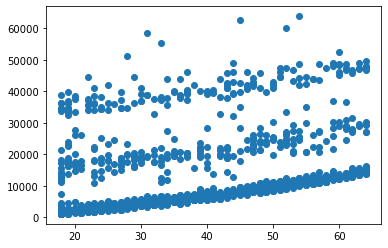

In [86]:
plt.scatter(df.age, df.charges)
plt.show()

In [87]:
print("The yearly average cost of patients is :" , np.mean(df.charges))

The yearly average cost of patients is : 13270.422265141257


In [90]:
print(set(df.region))

{'northeast', 'southwest', 'southeast', 'northwest'}
